In [1]:
# Install ggplot

In [1]:
## Loading relevant packages

import pandas as pd

In [34]:
from ggplot import diamonds
import matplotlib.pyplot as plt
import numpy as np

One of the important data wrangling steps is to select some parts of the data of interest from the whole data set. There are a number of ways to accomplish this task:

- selecting (keeping) variables of interest
- excluding (dropping) variables of interest
- filtering or conditional subsetting:
    - a set of conditions (or filter) is imposed on a set variables (i.e., columns) of interest (e.g., AGE > 55 & SEX == 'F') and
    - every case (i.e., row) that satisfies all those conditions, or passes the filter, is included into the target subset
- splitting:
    - the entire data set is split into two or more subsets
    - e.g., 90% cases are randomly selected as a train subset and the remaining 10% cases are then assigned to the test subset


# Getting familiar with the data

In [40]:
census = pd.read_csv('data_raw/census_us.csv')

In [8]:
census.shape

(6279, 288)

In [9]:
census.head()

,ORIGFILEROWNUMBER,ORIGFILENAME,ORIGINSERTTIME,ORIGRANDGROUP,RT,SERIALNO,SPORDER,PUMA,ST,ADJINC,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,1,file:csv_pus/ss11pusa.csv.gz,2013-02-12 17:04:40.875,2,P,19,1,1400,1,1018237,...,5,60,118,63,66,120,63,5,6,5
1,386,file:csv_pus/ss11pusa.csv.gz,2013-02-12 17:04:40.875,327,P,10374,1,1500,1,1018237,...,95,259,284,68,78,187,268,423,211,220
2,387,file:csv_pus/ss11pusa.csv.gz,2013-02-12 17:04:40.875,789,P,10374,2,1500,1,1018237,...,78,259,352,87,84,197,258,291,167,192
3,388,file:csv_pus/ss11pusa.csv.gz,2013-02-12 17:04:40.875,886,P,10374,3,1500,1,1018237,...,54,155,301,61,57,180,141,294,175,143
4,515,file:csv_pus/ss11pusa.csv.gz,2013-02-12 17:04:40.875,292,P,14299,1,2600,1,1018237,...,15,19,18,31,18,5,30,18,31,30


- AGEP: A person age
- COW: Employment class, such as for-profit company, nonprofit company
- SCHL: Education level such as no high school diploma, high school, college
- SEX: Sex of worker

Examine the summary statistics only for a select subset of variables of interest using all the rows for each of these variables:

In [13]:
var1 = ["AGEP", "COW", "SCHL", "SEX",
         "PINCP", "ESR", "PERNP", "WKHP",  "PWGTP1"]

In [16]:
census[var1].describe()

,AGEP,COW,SCHL,SEX,PINCP,ESR,PERNP,WKHP,PWGTP1
count,6279.000000,3668.000000,6049.000000,6279.000000,5194.000000,5110.000000,5110.000000,3100.000000,6279.000000
mean,40.201306,2.182388,15.637130,1.511546,31274.562957,3.155186,23777.825832,37.400323,103.001433
std,23.686748,1.987072,5.532888,0.499906,44562.881290,2.390279,42747.538383,13.333320,111.154927
min,0.000000,1.000000,1.000000,1.000000,-8700.000000,1.000000,-8700.000000,1.000000,0.000000
25%,20.000000,1.000000,13.000000,1.000000,6000.000000,1.000000,0.000000,31.000000,33.000000
50%,40.000000,1.000000,16.000000,2.000000,19000.000000,1.000000,7000.000000,40.000000,70.000000
75%,59.000000,3.000000,19.000000,2.000000,40000.000000,6.000000,33000.000000,40.000000,130.000000
max,95.000000,9.000000,24.000000,2.000000,570000.000000,6.000000,507000.000000,99.000000,1624.000000


# Selecting Columns

There are several ways to select a subset of data that keeps only the variables (columns) of interest for all the rows:


#### Specify the vector of these variables names as column indices:

In [18]:
var2 = ["AGEP", "COW", "SCHL", "SEX",
         "PINCP", "ESR", "PERNP", "WKHP",  "PWGTP1"]

In [19]:
new_census = census[var2]

In [20]:
new_census.shape

(6279, 9)

In [21]:
new_census.head()

,AGEP,COW,SCHL,SEX,PINCP,ESR,PERNP,WKHP,PWGTP1
0,19,NaN,19.0,2,0.0,6.0,0.0,NaN,5
1,43,1.0,19.0,1,22900.0,1.0,22900.0,40.0,233
2,51,3.0,16.0,2,17800.0,1.0,17800.0,35.0,242
3,16,NaN,13.0,1,3400.0,6.0,0.0,NaN,172
4,55,1.0,19.0,1,56800.0,1.0,20800.0,50.0,18


#### Subset with df.filter() method:

In [22]:
census_new = census.filter?

In [23]:
census_new = census.filter(items = vars_2_keep)

In [25]:
census_new.head()

,AGEP,COW,SCHL,SEX,PINCP,ESR,PERNP,WKHP,PWGTP1
0,19,NaN,19.0,2,0.0,6.0,0.0,NaN,5
1,43,1.0,19.0,1,22900.0,1.0,22900.0,40.0,233
2,51,3.0,16.0,2,17800.0,1.0,17800.0,35.0,242
3,16,NaN,13.0,1,3400.0,6.0,0.0,NaN,172
4,55,1.0,19.0,1,56800.0,1.0,20800.0,50.0,18


# Excluding columns
There are many reasons to exclude variables (columns). For example, if a variable has many missing values, you may want to drop it prior to further analyses. There are a number of ways to drop such variables.

#### Deleting columns for the variables of interest


In [26]:
del census_new["SEX"]

In [28]:
census_new.head()

,AGEP,COW,SCHL,PINCP,ESR,PERNP,WKHP,PWGTP1
0,19,NaN,19.0,0.0,6.0,0.0,NaN,5
1,43,1.0,19.0,22900.0,1.0,22900.0,40.0,233
2,51,3.0,16.0,17800.0,1.0,17800.0,35.0,242
3,16,NaN,13.0,3400.0,6.0,0.0,NaN,172
4,55,1.0,19.0,56800.0,1.0,20800.0,50.0,18


#### Using the df.drop() method:

In [29]:
var_to_drop = ['COW', 'WKHP']

In [32]:
census_new.drop(var_to_drop, axis = 1).head()

,AGEP,SCHL,PINCP,ESR,PERNP,PWGTP1
0,19,19.0,0.0,6.0,0.0,5
1,43,19.0,22900.0,1.0,22900.0,233
2,51,16.0,17800.0,1.0,17800.0,242
3,16,13.0,3400.0,6.0,0.0,172
4,55,19.0,56800.0,1.0,20800.0,18


# Filtering Rows with filter()

In [33]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


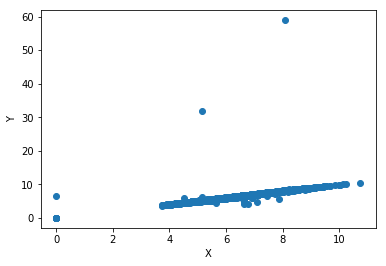

In [36]:
plt.plot(diamonds.x, diamonds.y, 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Observations:
- a few outliers are present
- observations with values 0 can be filtered out

In [37]:
q = 'x>0 & y>0 & y<20'

In [38]:
diamonds_filtered = diamonds.query(q)

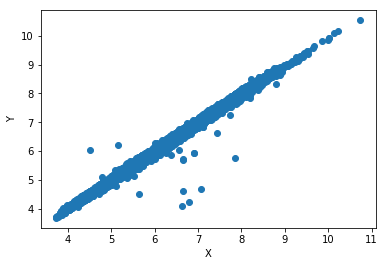

In [39]:
plt.plot(diamonds_filtered.x, diamonds_filtered.y, 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Filtering or conditional filtering

## Conditioning for Data Subsetting
Let’s create a set of conditions to subset the data on. The goal is to select a subset of “typical full-time workers” by restring the subset to data that meets all of the following conditions:

- Workers self-described as full-time employees (COW)
- Workers reported at least 40 hours a week of activity (WKHP)
- Workers 20-50 years of age (AGEP)
- workers with an annual income (PINCP and PERNP) between $1,000 and $250,000 U.S. dollars.
- Add a new indicator variable is_stdworker of whether the worker is a standard worker by our definition above or not (i.e., TRUE or FALSE).

In [42]:
filter1 = (census.PINCP > 1000) & (census.PINCP < 250000) & \
(census.AGEP >= 20) & (census.AGEP <= 50) &\
(census.PERNP > 1000) & (census.PERNP < 250000) & \
(census.WKHP >= 40)

In [43]:
census['is_stdworker'] = np.where(filter1, True, False)

In [44]:
census["is_stdworker"].head()

0    False
1     True
2    False
3    False
4    False
Name: is_stdworker, dtype: bool

In [45]:
census.shape

(6279, 289)

### Filtering: Subsetting based on Conditions
So far we completed re-recording of factor variables into meaningful categories and building an indicator variable for a standard worker conditioning. Now we can actually subset the full data using the query() command based on the value of the conditioning variable:

In [46]:
std_workers = census.query('is_stdworker==True')

In [47]:
std_workers.shape

(1354, 289)

### Re-encoding Categorical Variables
For the purpose of readability, we want to provide more descriptive names to variable values that are currently coded as numeric values. This way we will end up with meaningful, more readable and interpretable categorical names. It will also prevent accidentally treating such variables as mere numeric values. Note that we will be making those changes on the newly created subset of interest. This way, we keeping the original data intact.

###  Re-encode sex from 1/2 to M/F

In [48]:
conversions = {'SEX':{1:'M',2:'F'}}

In [49]:
std_workers.replace(conversions, inplace=True)

/home/tushar/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [50]:
std_workers.SEX = std_workers.SEX.astype('category')

/home/tushar/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [51]:
std_workers.SEX.head()

1     M
9     F
15    F
27    M
32    F
Name: SEX, dtype: category
Categories (2, object): [F, M]

### Re-encode class of worker info into a more readable form

In [52]:
std_workers.COW.unique()

array([1., 2., 3., 7., 5., 4., 6., 8.])

In [54]:
cow_map = {
    1.0:'A',
    2.0:'B',
    3.0:'C',
    4.0:'D',
    5.0:'E',
    6.0:'F',
    7.0:'G',
    8.0:'H'
}

In [55]:
std_workers.replace({'COW':cow_map}, inplace = True)

/home/tushar/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [56]:
std_workers.COW = std_workers.COW.astype('category')

/home/tushar/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [57]:
std_workers.COW.head()

1     A
9     A
15    A
27    A
32    A
Name: COW, dtype: category
Categories (8, object): [A, B, C, D, E, F, G, H]

### Re-encode education info into a more readable form and fewer levels by merging all levels below high school into same encoding

In [58]:
std_workers.SCHL.unique()

array([19., 16., 13., 21.,  8., 23., 17., 20., 22., 15., 18., 14., 24.,
        9., 10., 11., 12.,  6.,  1.,  7.,  5.])

#### Suppose below 20 is no high school diploma

In [59]:
school_map = ['ZZ'] * 20 + ['A','B','C','D']

In [62]:
original_map = range(1,25)

In [64]:
std_workers.SCHL.replace(original_map, school_map, inplace = True)

/home/tushar/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [67]:
std_workers.SCHL = std_workers.SCHL.astype('category')

/home/tushar/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [68]:
std_workers.SCHL.head()

1     ZZ
9     ZZ
15    ZZ
27    ZZ
32    ZZ
Name: SCHL, dtype: category
Categories (5, object): [A, B, C, D, ZZ]

# BONUS: Splitting for Modeling: Train and Test
Suppose that you want to further split your data of interest into two subsets:
- a train set that will be used for creating a predictive model, say to build a regression model that predicts income of a standard worker and
- a test set that will be used for testing the model
- Let’s first add a random variable (flag) drawn from a uniform distribution on the [0, 1] interval using the numpy.random.uniform() function: If this variable’s value for a particular case/row is above a certain threshold, then the case will be included into a train case; otherwise, it will be assigned as a test case.

- Suppose that the desirable split is as follows:
    - 90% of the data for the train subset and
    - the remaining 10% of the data for the test subset

In [70]:
std_workers['flag']= np.random.uniform(0,1,len(std_workers))

/home/tushar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
dtrain = std_workers[std_workers['flag'] >= 0.1]

In [72]:
dtest = std_workers[std_workers['flag'] < 0.1]

In [82]:
dtest.groupby('COW')['COW'].count()

COW
A    97
B    14
C     5
D     4
E     3
F     6
G     6
H     0
Name: COW, dtype: int64

In [83]:
dtrain.groupby('COW')['COW'].count()

COW
A    839
B    120
C     86
D     49
E     56
F     37
G     30
H      2
Name: COW, dtype: int64

# BONUS: Saving the Data Subsets
Save the data sets you prepared for future analysis and modeling as a csv file so that you can easily load it later when you are ready for your modeling tasks:

In [85]:
std_workers.to_csv('stdworkers.csv')
dtrain.to_csv('dtrain.csv')
dtest.to_csv('dtest.csv')

In [86]:
ls

01.NumPy.ipynb                      dtest.csv
02.Pandas.ipynb                     dtrain.csv
03.NumPy_IO_Helper_Functions.ipynb  index.json
04.DataIO_CSV_XLSX.ipynb            LordOfTheRings.txt*
05.JSON.ipynb                       Missing_Data.ipynb
06.XML_IO.ipynb                     records.json
a.npy                               RegularExpressions.ipynb
a.txt                               split.json
b.txt                               stdworkers.csv
columns.json                        Subset_Filter_Split.ipynb
Concatenate_Merge_Join.ipynb        values.json
csv_hr_db.csv                       weather_write.xlsx
data_raw/


# BONUS: Loading the Data Subsets

In [87]:
del std_workers
del dtest
del dtrain
std_workers.head()

NameError: name 'std_workers' is not defined

In [88]:
std_workers=pd.read_csv("stdworkers.csv")
std_workers.head()

,Unnamed: 0,ORIGFILEROWNUMBER,ORIGFILENAME,ORIGINSERTTIME,ORIGRANDGROUP,RT,SERIALNO,SPORDER,PUMA,ST,...,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80,is_stdworker,flag
0,1,386,file:csv_pus/ss11pusa.csv.gz,2013-02-12 17:04:40.875,327,P,10374,1,1500,1,...,284,68,78,187,268,423,211,220,True,0.209834
1,9,3078,file:csv_pus/ss11pusa.csv.gz,2013-02-12 17:04:40.875,947,P,94686,1,200,1,...,93,368,98,290,302,346,527,392,True,0.246585
2,15,8029,file:csv_pus/ss11pusa.csv.gz,2013-02-12 17:04:40.875,840,P,240267,1,2300,1,...,40,12,38,38,48,65,34,62,True,0.133162
3,27,10721,file:csv_pus/ss11pusa.csv.gz,2013-02-12 17:04:40.875,465,P,323568,2,300,1,...,146,243,131,149,238,142,285,151,True,0.097567
4,32,13420,file:csv_pus/ss11pusa.csv.gz,2013-02-12 17:04:40.875,1,P,405943,1,1300,1,...,89,274,308,318,489,293,93,333,True,0.505051
